In [1]:
import math
import numpy as np
import cmath as cm

import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
### The objective function f_1
def f(x):
    a = np.array([2, -3])
    return (np.dot(a, x))**2 + sum([ x[i]**2 * (1-x[i])**2 for i in range(len(x))])

def grad_f(x):
    return np.array([10*x[0] - 6*x[0]**2 + 4*x[0]**3 - 12*x[1] , 20*x[1] - 6*x[1]**2 + 4*x[1]**3 - 12*x[0] ])
    
def hess_f(x):
    return np.array([
        [10 - 12*x[0] + 12*x[0]**2 , -12 ],
        [-12 , 20 - 12*x[1] + 12*x[1]**2 ]
    ])

def f_comp(z): # z \in C^2
    a = np.array([2, -3])
    return (np.dot(a, z))**2 + sum([ z[i]**2 * (1-z[i])**2 for i in range(len(z))])

def grad_f_comp(z):
    return np.array([10*z[0] - 6*z[0]**2 + 4*z[0]**3 - 12*z[1] , 20*z[1] - 6*z[1]**2 + 4*z[1]**3 - 12*z[0] ])

##############################################################
### The objective function f_2
# def f(x):
#     return (x[0] - x[1])**2 + (x[0]*(1-x[0]))**2 + (x[1]*(2-x[1]))**2

# def grad_f(x):
#     return np.array([4*x[0]**3 - 6*x[0]**2 +4*x[0] - 2*x[1], 4*x[1]**3 - 12*x[1]**2 + 10*x[1] - 2*x[0] ])
    
# def hess_f(x):
#     return np.array([
#         [12*x[0]**2 - 12*x[0] + 4 , -2 ],
#         [-2 , 12*x[1]**2 - 24*x[1] + 10 ]
#     ])

# def f_comp(z): # z \in C^2
#     return (z[0] - z[1])**2 + (z[0]*(1-z[0]))**2 + (z[1]*(2-z[1]))**2

# def grad_f_comp(z):
#     return np.array([4*z[0]**3 - 6*z[0]**2 +4*z[0] - 2*z[1], 4*z[1]**3 - 12*z[1]**2 + 10*z[1] - 2*z[0] ])

In [3]:
### for f_1
global_min = np.array([0,0])               ### we take the min_1 from the list of minimums
localmin_1 = np.array([1.04987, 0.709507]) ### we take the min_2 from the list of minimums
saddle_point = np.array([0.57788, 0.37892])

global_min_com = np.array([ global_min[0] + 0*1j, global_min[1] + 0*1j ])
local_min_com = np.array([ localmin_1[0] + 0*1j, localmin_1[1] + 0*1j ])
saddle_point_com = np.array([saddle_point[0] + 0*1j, saddle_point[1] + 0*1j])

print ('f(global min) =' , f(global_min))
print ('f(local min) =' , f(localmin_1))
print ('f(saddle point) =' , f(saddle_point))

##################################
### for f_2 
# global_min = np.array([0,0])                  ### we take the min_1 from the list of minimums
# localmin_1 = np.array([1.27473, 1.81735])      ### we take the min_2 from the list of minimums
# saddle_point = np.array([1, 1])

# global_min_com = np.array([ global_min[0] + 0*1j, global_min[1] + 0*1j ])
# local_min_com = np.array([ localmin_1[0] + 0*1j, localmin_1[1] + 0*1j ])
# saddle_point_com = np.array([saddle_point[0] + 0*1j, saddle_point[1] + 0*1j])

# print ('f(global min) =' , f(global_min))
# print ('f(local min) =' , f(localmin_1))
# print ('f(saddle point) =' , f(saddle_point))

f(global min) = 0
f(local min) = 0.04604962317333992
f(saddle point) = 0.11524988373914094


In [4]:
### for generating the intial points
h_ = 0.13
a_1 = -1
b_1 = 2
a_2 = -1
b_2 = 2

Initial_points_reals = []
for s in np.arange(a_1, b_1 + h_, h_):
    for t in np.arange(a_2, b_2 + h_, h_):
        #z0 = np.array([s,t])
        z0 = s + 1j*t
        Initial_points_reals.append(z0)
print('The number of real intial points    =' , len(Initial_points_reals))

Initial_points_complex = []
d_ = 0   # the imaginary part of the coordinates of the items of the initial points.
for s in np.arange(a_1, b_1 + h_, h_):
    for t in np.arange(a_2, b_2 + h_, h_):
        z0 = np.array([s + d_*1j, t + d_*1j])
        Initial_points_complex.append(z0)
print('The number of complex intial points =' , len(Initial_points_complex))

The number of real intial points    = 625
The number of complex intial points = 625


In [5]:
#Initial_points_reals

In [6]:
#Initial_points_complex

In [7]:
R = 1000 # for the stopping in the case of divergence

In [8]:
### Ordinary Newton method 

points_to_local_1   = []    # convergence to local min 1
points_to_global    = []    #  convergence to global min  
points_to_saddle    = []    #  convergence to saddle point
divergence_points   = []    # the points in the case of divergence
not_conver_points   = []    # the points in the case when there is not a covergence after 10^6 iterations

start_time = datetime.now()
for z0 in Initial_points_reals :
    z = np.array([z0.real, z0.imag])

    k = 0
        
    while (np.linalg.norm(z - localmin_1) > 1e-5 and np.linalg.norm(z - global_min) > 1e-5
           and np.linalg.norm(z - saddle_point) > 1e-5 ) :

        ### the iterations
        inverse = np.linalg.inv( np.array(np.matrix(grad_f(z)).T * np.matrix(grad_f(z))) 
                              + f(z)*hess_f(z) )                                 # the inverse in MNM
        z1 = z - np.dot(inverse, np.dot(f(z), grad_f(z)))
        z = z1
        k += 1
            
        if (np.linalg.norm(z - localmin_1) <= 1e-5):
            points_to_local_1.append([z0.real, z0.imag])     
            break

        if (np.linalg.norm(z - global_min) <= 1e-5):
            points_to_global.append([z0.real, z0.imag])
            break
            
        if (np.linalg.norm(z - saddle_point) <= 1e-5):
            points_to_saddle.append([z0.real, z0.imag])
            break

        if (np.linalg.norm(z) >= R):
            divergence_points.append([z0.real, z0.imag])
            break
            
        if (k >= 10**6):
            not_conver_points.append([z0.real, z0.imag])
            break
    
end_time=datetime.now()
Time_work = (end_time-start_time).total_seconds()  
print ('Time (seconds)=' , Time_work)

Time (seconds)= 1.332178


In [9]:
print ('The number of initial points for convergence to local min 1 =' , len(points_to_local_1))   

The number of initial points for convergence to local min 1 = 319


In [10]:
print ('The number of initial points for convergence to global min =' , len(points_to_global))   

The number of initial points for convergence to global min = 276


In [11]:
print ('The number of initial points for convergence to saddle point =' , len(points_to_saddle))    

The number of initial points for convergence to saddle point = 30


In [12]:
points_to_saddle

[[-0.35, 1.4700000000000002],
 [-0.08999999999999997, 1.21],
 [0.16999999999999993, 0.8200000000000001],
 [0.16999999999999993, 0.9500000000000002],
 [0.30000000000000004, 0.30000000000000004],
 [0.30000000000000004, 0.43000000000000016],
 [0.30000000000000004, 0.56],
 [0.30000000000000004, 0.69],
 [0.30000000000000004, 0.8200000000000001],
 [0.43000000000000016, 0.16999999999999993],
 [0.43000000000000016, 0.30000000000000004],
 [0.43000000000000016, 0.43000000000000016],
 [0.43000000000000016, 0.56],
 [0.43000000000000016, 0.69],
 [0.43000000000000016, 0.8200000000000001],
 [0.56, 0.16999999999999993],
 [0.56, 0.30000000000000004],
 [0.56, 0.43000000000000016],
 [0.56, 0.56],
 [0.56, 0.69],
 [0.56, 0.8200000000000001],
 [0.69, 0.16999999999999993],
 [0.69, 0.30000000000000004],
 [0.69, 0.43000000000000016],
 [0.69, 0.56],
 [0.69, 0.69],
 [0.69, 0.8200000000000001],
 [0.9500000000000002, -0.08999999999999997],
 [1.08, -0.21999999999999997],
 [1.3399999999999999, -0.48]]

In [13]:
print ('The number of initial points for divergence =' , len(divergence_points))  

The number of initial points for divergence = 0


In [14]:
divergence_points

[]

In [15]:
print ('The number of initial points for not convergence after 1000000 iterations =' , len(not_conver_points))  

The number of initial points for not convergence after 1000000 iterations = 0


In [16]:
not_conver_points

[]

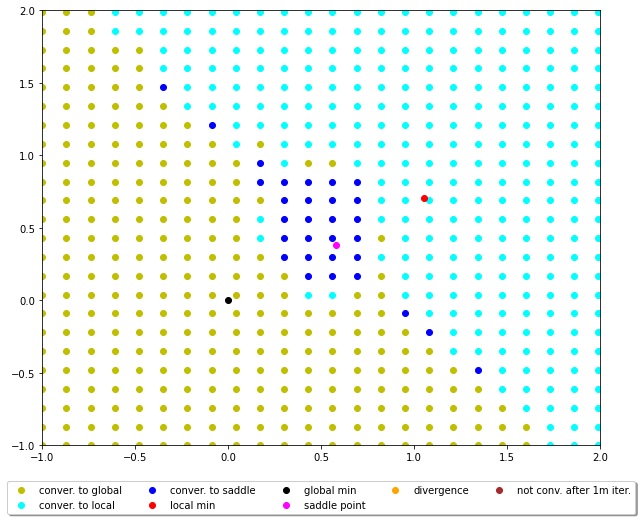

In [17]:
plt.figure(figsize=(10, 8))

x_local_min1 = [w[0] for w in points_to_local_1]      # local min
y_local_min1 = [w[1] for w in points_to_local_1]

x_global_min = [w[0] for w in points_to_global]       # global min
y_global_min = [w[1] for w in points_to_global] 

x_saddle = [w[0] for w in points_to_saddle]           # saddle point
y_saddle = [w[1] for w in points_to_saddle] 

x_divergence = [w[0] for w in divergence_points]      # divergence
y_divergence = [w[1] for w in divergence_points]

x_not_convergence = [w[0] for w in not_conver_points] # not converence after 10000 iters
y_not_convergence = [w[1] for w in not_conver_points]

plt.axis([a_1, b_1, a_2, b_2])
#plt.grid(1)


plt.scatter(x_global_min, y_global_min, label="conver. to global", color="y")   
plt.scatter(x_local_min1, y_local_min1, label = "conver. to local", color="cyan")
plt.scatter(x_saddle, y_saddle, label = "conver. to saddle", color="blue")

plt.scatter(localmin_1[0], localmin_1[1], label="local min", color="red")  
plt.scatter(global_min[0], global_min[1], label="global min", color="black")
plt.scatter(saddle_point[0], saddle_point[1], label="saddle point", color="magenta")


plt.scatter(x_divergence, y_divergence, label="divergence", color="orange") 
plt.scatter(x_not_convergence, y_not_convergence, label="not conv. after 1m iter.", color="brown")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=5)

#plt.title ('title')

plt.show()

In [18]:
### Mixed Newton method with regulirization
gamma = 1e-3

comp_points_to_local_1   = []    # convergence to local min
comp_points_to_global    = []    #  convergence global min 
comp_points_to_saddle    = []    #  convergence to saddle point
comp_divergence_points   = []    # the points in the case of divergence
comp_not_conver_points   = []    # the points in the case when there is not a covergence after 10^6 iterations


start_time = datetime.now()
for z0 in Initial_points_complex:
    z = z0

    k = 0
        
    while (np.linalg.norm(z - local_min_com) > 1e-5 and np.linalg.norm(z - global_min_com) > 1e-5 
          and np.linalg.norm(z - saddle_point_com) > 1e-5 ) :

        ### the iterations
        cosh_matrix  = np.array( [ [np.cosh(2*(z[0].imag)) , 0 ], [0 , np.cosh(2*(z[1].imag)) ] ])
        inverse_term = np.linalg.inv( np.array( np.conjugate(np.matrix(grad_f_comp(z)).T) * np.matrix(grad_f_comp(z)) ) \
                              + 2*(gamma**2)*cosh_matrix )
        
        sinh_vec = np.array([np.sinh(2*(z[0].imag)) , np.sinh(2*(z[1].imag))])
        prod_term = np.dot(f_comp(z), np.conjugate(grad_f_comp(z) )) + np.dot(2*1j*(gamma**2), sinh_vec)
        
        z1 = z - np.dot(inverse_term, prod_term)
                
        z = z1
        k += 1
 
        if (np.linalg.norm(z - local_min_com) <= 1e-5):
            comp_points_to_local_1.append(z0)           
            break
    
        if (np.linalg.norm(z - global_min_com) <= 1e-5):
            comp_points_to_global.append(z0)        
            break
            
        if (np.linalg.norm(z - saddle_point_com) <= 1e-5):
            comp_points_to_saddle.append(z0)        
            break

        if (np.linalg.norm(z) >= R):
            comp_divergence_points.append(z0)
            break
            
        if (k >= 10**6):
            comp_not_conver_points.append(z0)
            break
    
end_time=datetime.now()
Time_work = (end_time-start_time).total_seconds()  
print ('Time (seconds)=' , Time_work)

Time (seconds)= 452.835489


In [19]:
print ('The number of initial points for convergence to local min 1 =' , len(comp_points_to_local_1))   

The number of initial points for convergence to local min 1 = 0


In [20]:
print ('The number of initial points for convergence to global min =' , len(comp_points_to_global)) 

The number of initial points for convergence to global min = 625


In [21]:
print ('The number of initial points for convergence to saddle =' , len(comp_points_to_saddle))  

The number of initial points for convergence to saddle = 0


In [22]:
comp_points_to_saddle

[]

In [23]:
print ('The number of initial points for divergence =' , len(comp_divergence_points))  # divergence  

The number of initial points for divergence = 0


In [24]:
comp_divergence_points

[]

In [25]:
print ('The number of initial points for not convergence after 1000000 iterations =', len(comp_not_conver_points) )

The number of initial points for not convergence after 1000000 iterations = 0


In [26]:
comp_not_conver_points

[]

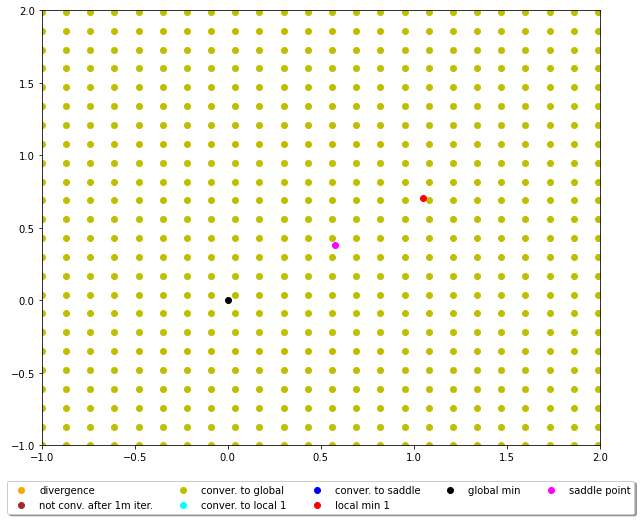

In [27]:
plt.figure(figsize=(10, 8))

x_local_min1 = [w[0].real for w in comp_points_to_local_1]   # local min 
y_local_min1 = [w[1].real for w in comp_points_to_local_1]

x_global_min = [w[0].real for w in comp_points_to_global]    # global min
y_global_min = [w[1].real for w in comp_points_to_global]

x_saddle = [w[0].real for w in comp_points_to_saddle]        # saddle point
y_saddle = [w[1].real for w in comp_points_to_saddle]

x_divergence = [w[0].real for w in comp_divergence_points]   # divergence  
y_divergence = [w[1].real for w in comp_divergence_points]

x_not_convergence = [w[0].real for w in comp_not_conver_points]  # not convergence after 10^6 iterations
y_not_convergence = [w[1].real for w in comp_not_conver_points]

plt.axis([a_1, b_1, a_2, b_2])
#plt.grid(1)


plt.scatter(x_divergence, y_divergence, label="divergence", color="orange") 
plt.scatter(x_not_convergence, y_not_convergence, label="not conv. after 1m iter.", color="brown")

plt.scatter(x_global_min, y_global_min, label="conver. to global", color="y") 
plt.scatter(x_local_min1, y_local_min1, label = "conver. to local 1", color="cyan")
plt.scatter(x_saddle, y_saddle, label = "conver. to saddle", color="blue")

plt.scatter(localmin_1[0], localmin_1[1], label="local min 1", color="red")
plt.scatter(global_min[0], global_min[1], label="global min", color="black") 
plt.scatter(saddle_point[0], saddle_point[1], label="saddle point", color="magenta")


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=5)

#plt.title ('title')

plt.show()